In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [17]:
# reflect an existing database into a new model
Base=automap_base()
Base.prepare(engine,reflect=True)

Station=Base.classes.station
Measurements=Base.classes.measurement
# reflect the tables
session=Session(engine)

C:\Users\Rosa\AppData\Local\Temp\ipykernel_9360\1456131966.py:3: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine,reflect=True)


In [18]:
# View all of the classes that automap found
for cls in Base.classes:
    print(cls)

<class 'sqlalchemy.ext.automap.station'>
<class 'sqlalchemy.ext.automap.measurement'>


In [19]:
# Save references to each table
Station=Base.classes.station 
Measurements=Base.classes.measurement

In [20]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Precipitation Analysis

In [22]:
# Find the most recent date in the data set.
latest_date=session.query(Measurements.date).order_by(Measurements.date.desc()).first()[0]

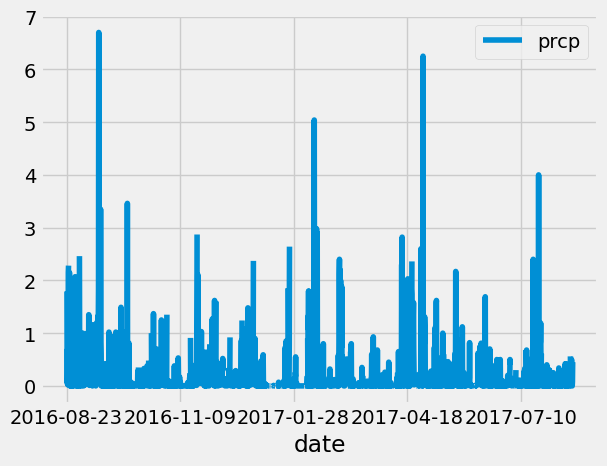

In [24]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
prev_year=func.date(latest_date, "-12 months")
# Starting from the most recent data point in the database. 
results=session.query(Measurements.date, Measurements.prcp).filter(Measurements.date>=prev_year).all()
# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame. Explicitly set the column names
df=pd.DataFrame(results,columns=["date","prcp"])

# Sort the dataframe by date
df.set_index("date",inplace=True)
df.sort_values("date", inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
df.plot()
plt.show()

In [25]:
# Use Pandas to calculate the summary statistics for the precipitation data
print(df.describe())

              prcp
count  2021.000000
mean      0.177279
std       0.461190
min       0.000000
25%       0.000000
50%       0.020000
75%       0.130000
max       6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
total_stations=session.query(func.count(Station.station)).scalar()

[(9,)]

In [30]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
most_active_stations=session.query(Measurements.station, func.count(Measurements.station)).order_by(func.count(
Measurements.station).desc()).all()

print("Most active stations", most_active_stations)

most_active_stations=most_active_stations[0][0]
print("Station with greatest number of observations:", most_active_stations)

# List the stations and their counts in descending order.
station_counts=session.query(Measurements.station, func.count(Measurements.station)).order_by(func.count(
Measurements.station).desc()).all()

print("Stations and thier counts in descedning order:")
for station, count in station_counts:
    print(f"Station: {station}, Count: {count}")



Most active stations [('USC00519397', 19550)]
Station with greatest number of observations: USC00519397
Stations and thier counts in descedning order:
Station: USC00519397, Count: 19550


In [32]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest_temp=session.query(func.min(Measurements.tobs)).filter(Measurements.station==most_active_stations).scalar()
highest_temp=session.query(func.max(Measurements.tobs)).filter(Measurements.station==most_active_stations).scalar()
average_temp=session.query(func.avg(Measurements.tobs)).filter(Measurements.station==most_active_stations).scalar()

print(f"lowest temperature: {lowest_temp}, Highest temperature: {highest_temp}, Average temperature: {average_temp}")

lowest temperature: 56.0, Highest temperature: 87.0, Average temperature: 74.55323054331865


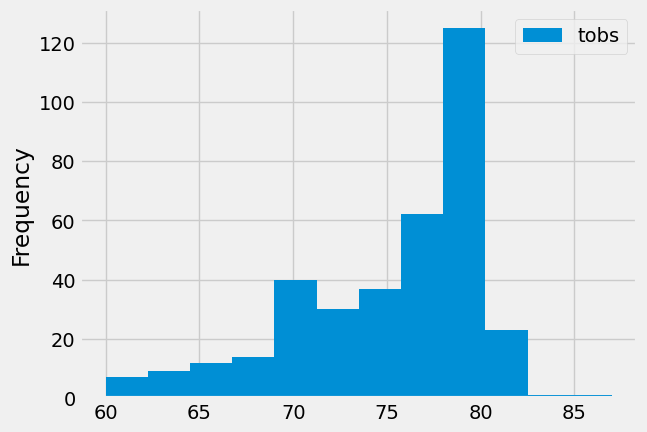

In [33]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_results=session.query(Measurements.tobs).filter(Measurements.date>=prev_year).filter(Measurements.station==most_active_stations).all()

tobs_df=pd.DataFrame(tobs_results, columns=["tobs"])
tobs_df.plot.hist(bins=12)
plt.show()

# Close Session

In [16]:
# Close Session
session.close()